# Pymaceuticals Inc.
---

### Observations and Insights

- My first observations is that of the top `2` Drug Regiments, which are Capomulin and Ramicane, Capomulin had less variabliity within its midspread. ALso of the top `4` drug regiments, Infubibnol was the only drug regiment shown to have an outlier which lies outside the lower bound.

- My second observation is that the Capomulin drug was highly effective in reducing the Tumor Volume of the `s185` mouse. According to my line plot below the drug was able to reduce the tumor volume by at least `50%`.

- My third observation is that as the weight of the mouse increases the tumor volume increases as well. This shows that there is a positive correlation between the weight and the tumor volume of the mice. The Pearson correlation coefficient of `0.84` shows that there is a high degree of correlation between these two varilables. 

In [27]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import scipy.stats       as st

# Study data files

path_mouse_metadata = "data/Mouse_metadata.csv"
path_study_results  = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(path_mouse_metadata)
study_results  = pd.read_csv(path_study_results)

# Combine the data into a single dataset

merged_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview

merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice.

len(merged_data['Mouse ID'].unique())

249

In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data = merged_data[merged_data.duplicated(subset = ["Mouse ID", "Timepoint"])]

duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_data[merged_data["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = merged_data.loc[merged_data["Mouse ID"] != "g989"]

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice in the clean DataFrame.

len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
# volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stat           = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary_stat           = summary_stat[["mean", "std"]]
summary_stat["var"]    = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stat["median"] = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_stat["sem"]    = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stat           = summary_stat[["mean", "median","var", "std","sem"]]
summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

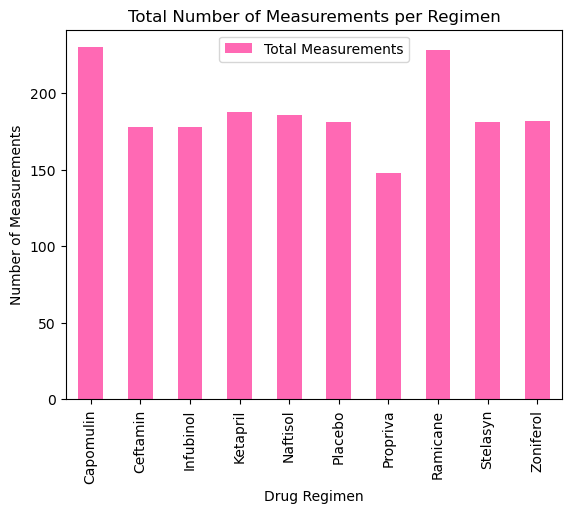

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_group = clean_data.groupby("Drug Regimen").count()
pandas_bar    = regimen_group[["Mouse ID"]].rename(columns = {"Mouse ID":"Total Measurements"})

pandas_bar.plot(kind = "bar", color='hotpink')

plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")

plt.show()

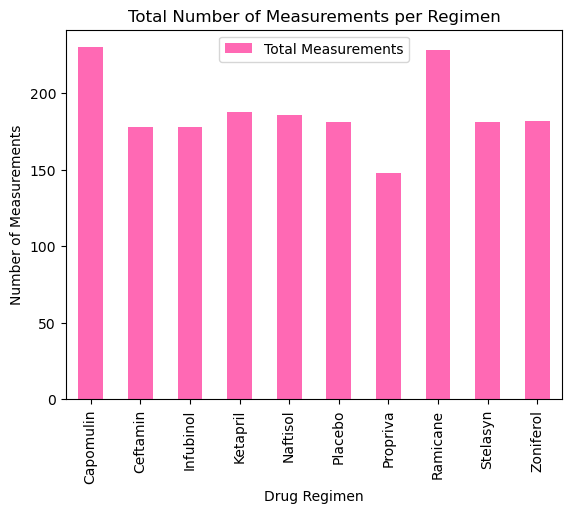

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimen_group = clean_data.groupby("Drug Regimen").count()
pandas_bar    = regimen_group[["Mouse ID"]].rename(columns = {"Mouse ID":"Total Measurements"})

pandas_bar.plot(kind = "bar", color='hotpink')

plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")

plt.show()

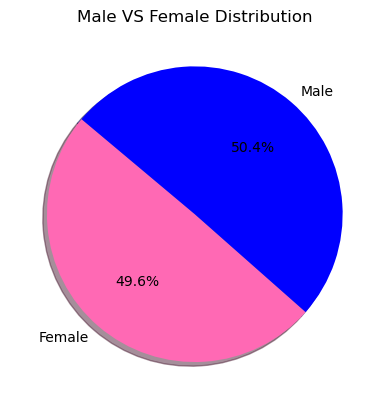

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df = clean_data.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()
sex_df = sex_df["Mouse ID"].to_frame().rename(columns ={ "Mouse ID" : "Total"})

colors = ["hotpink", "blue"]

sex_df.plot(kind = "pie", y = "Total", title = "Male VS Female Distribution",autopct="%1.1f%%",
            shadow=True, startangle=140, colors = colors, legend = False).yaxis.set_visible(False)

Text(0.5, 1.0, 'Male VS Female Distribution')

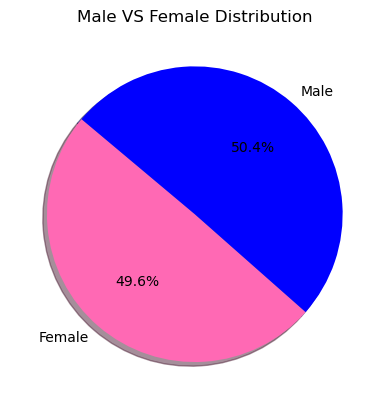

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

males   = sex_df.loc["Male", "Total"]
females = sex_df.loc["Female", "Total"]
labels  = sex_df.index
colors  = ["hotpink", "blue"]
sizes   = [females, males]

plt.pie(sizes,labels=labels, colors = colors,
      autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Male VS Female Distribution")

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

copy_clean = pd.DataFrame.copy(clean_data)
final_four = clean_data.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()

# Start by getting the last (greatest) timepoint for each mouse

final_four = final_four.groupby("Mouse ID")["Timepoint"].max()
final_four = pd.DataFrame(final_four).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged = pd.merge(copy_clean, final_four, on = ["Timepoint", "Mouse ID"])

merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [54]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
lists = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles      = merged["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
IQR            = upper_quartile - lower_quartile

print("The lower quartile of Tumor Volume (mm3) is:", lower_quartile)
print("The upper quartile of Tumor Volume (mm3) is:", upper_quartile)
print("The Interquartile range of Tumor Volume (mm3) is:", IQR)
    
# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    for index, row in merged.iterrows():
        if row["Drug Regimen"] == treatment:
            lists.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])

df = pd.DataFrame(lists)

# Determine outliers using upper and lower bounds
lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

print("Values below", lower_bound, "could be outliers")
print("Values above", upper_bound, "could be outliers")

The lower quartile of Tumor Volume (mm3) is: 37.1877438025
The upper quartile of Tumor Volume (mm3) is: 59.930261755
The Interquartile range of Tumor Volume (mm3) is: 22.742517952499995
Values below 3.0739668737500097 could be outliers
Values above 94.04403868374999 could be outliers


Text(0.5, 1.0, 'Variability of Top 4 Drug Regiments')

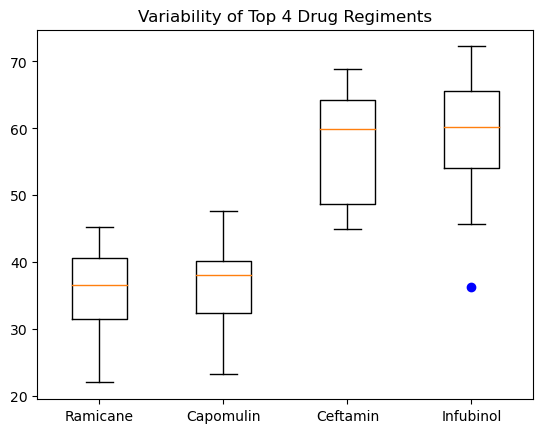

In [55]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot([df["Ramicane"], df["Capomulin"], df["Ceftamin"], df["Infubinol"]], labels = treatments, sym = "b")

plt.title("Variability of Top 4 Drug Regiments")

## Line and Scatter Plots

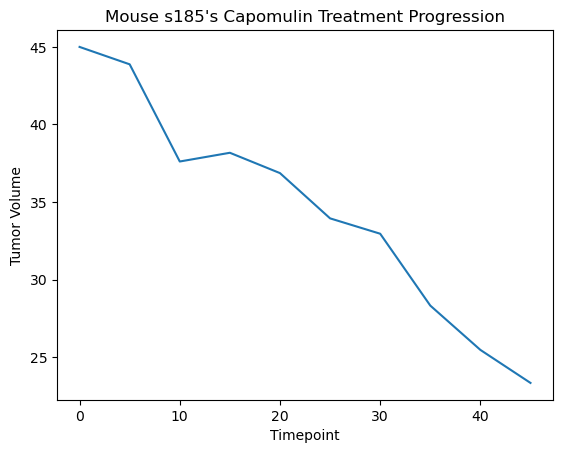

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

s185    = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].loc[clean_data["Mouse ID"] == "s185"]
lx_axis = s185["Timepoint"].tolist()
ly_axis = s185["Tumor Volume (mm3)"].tolist()

plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse s185's Capomulin Treatment Progression")

plt.show()

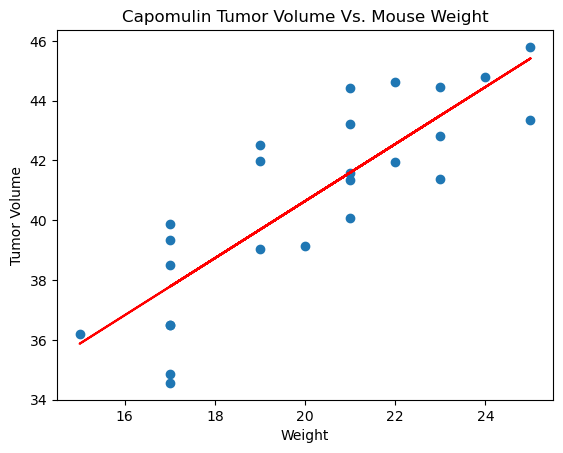

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_weight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis          = Capomulin_weight["Weight (g)"]
sy_axis          = Capomulin_weight["Tumor Volume (mm3)"]

#Code from below cells for regression line

correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

plt.scatter(sx_axis,sy_axis)
plt.title("Capomulin Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.plot(sx_axis,regress_values, "r-")

plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

print("The correlation between both factors is:", round(correlation[0],2))
print("Linear Regressions Model: y = " +  str(round(slope, 2)) + 'x + ' + str(round(intercept, 2)))

The correlation between both factors is: 0.84
Linear Regressions Model: y = 0.95x + 21.55
